In [1]:
include("./SDF/SerialSDF.jl");
include("./SDF/SDFVis.jl");
using .SerialSDF
using .SDFVis

In [2]:
# 2x2 in the center of a matrix
midpoint = zeros(Bool, 256,256)
midpoint[128:129, 128:129] .= true
# create just a couple of random
dots = rand(Float64,256,256) .< 0.001
# circle shapes
circle = zeros(Bool, 256,256)
filledCircle = zeros(Bool, 256,256)

for x in 1:256
    for y in 1:256
        dist = sqrt((x-128.5)^2 + (y-128.5)^2)
        circle[x,y] = dist ≥ 100 && dist ≤ 101
        filledCircle[x,y] = dist ≤ 50
    end
end

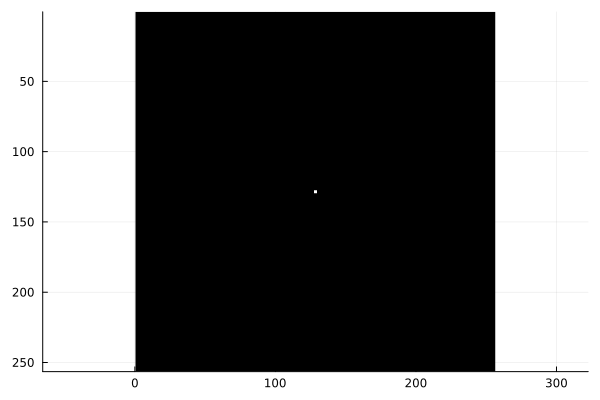

In [3]:
using Colors, Plots
plot(Gray.(midpoint))

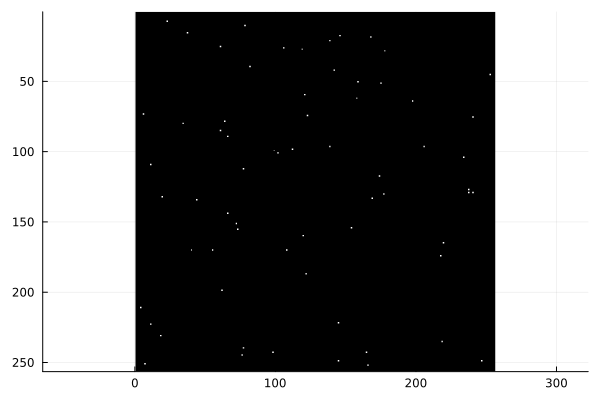

In [4]:
plot(Gray.(dots))

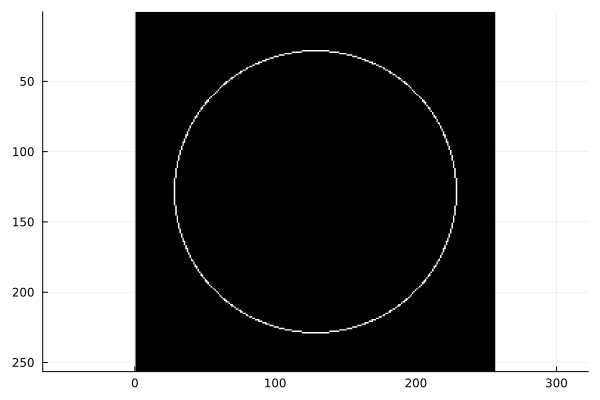

In [5]:
plot(Gray.(circle))

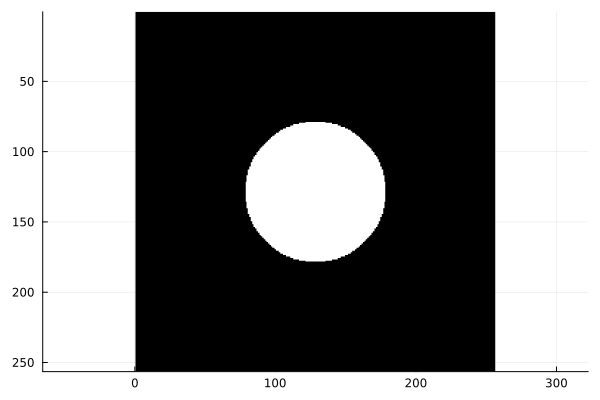

In [6]:
plot(Gray.(filledCircle))

In [7]:
@time filledCircleSDF = bruteSDF2D(filledCircle)

  3.909845 seconds (38.55 k allocations: 2.501 MiB, 0.64% compilation time)


256×256 Matrix{Float64}:
 130.11   129.401  128.695  127.986  …  127.986  128.695  129.401  130.11
 129.401  128.695  127.986  127.281     127.281  127.986  128.695  129.401
 128.695  127.986  127.281  126.572     126.572  127.281  127.986  128.695
 127.986  127.281  126.572  125.867     125.867  126.572  127.281  127.986
 127.281  126.572  125.867  125.158     125.158  125.867  126.572  127.281
 126.572  125.867  125.158  124.453  …  124.453  125.158  125.867  126.572
 125.867  125.158  124.453  123.744     123.744  124.453  125.158  125.867
 125.158  124.453  123.744  123.039     123.039  123.744  124.453  125.158
 124.453  123.744  123.039  122.329     122.329  123.039  123.744  124.453
 123.744  123.039  122.329  121.624     121.624  122.329  123.039  123.744
 123.039  122.329  121.624  120.915  …  120.915  121.624  122.329  123.039
 122.338  121.624  120.915  120.21      120.21   120.915  121.624  122.338
 121.641  120.924  120.21   119.501     119.501  120.21   120.924  121.641
 

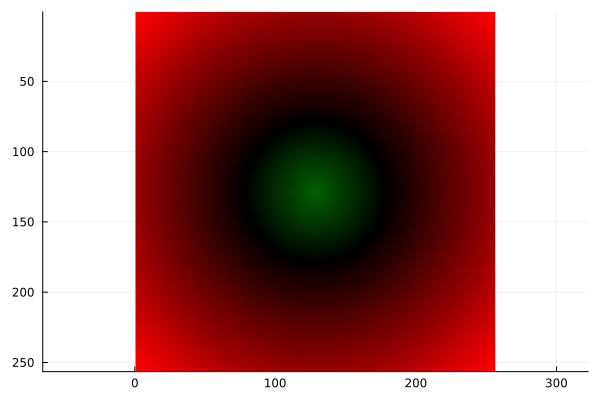

In [8]:
plot(toImageSDF(filledCircleSDF, 0.01))

In [9]:
@time dotsSDF = bruteSDF2D(dots)

  5.287595 seconds (55.07 k allocations: 3.164 MiB, 0.64% compilation time)


256×256 Matrix{Float64}:
 22.1923   21.225    20.2608   19.3003   …  43.5029   43.5259   43.5718
 21.9659   20.9881   20.0125   19.0394      42.5029   42.5265   42.5735
 21.783    20.7966   19.8116   18.8282      41.503    41.5271   41.5752
 21.6449   20.6519   19.6596   18.6682      40.5031   40.5278   40.5771
 21.5523   20.5548   19.5576   18.5607      39.5032   39.5285   39.579
 21.5058   20.5061   19.5064   18.5068   …  38.5032   38.5292   38.5811
 21.5      20.5      19.5      18.5         37.5033   37.53     37.5832
 21.5058   20.5061   19.5064   18.5068      36.5034   36.5308   36.5855
 21.5523   20.5548   19.5576   18.5607      35.5035   35.5317   35.5879
 21.6449   20.6519   19.6596   18.6682      34.5036   34.5326   34.5905
 21.783    20.7966   19.8116   18.8282   …  33.5037   33.5336   33.5932
 21.9659   20.9881   20.0125   19.0394      32.5038   32.5346   32.596
 22.1923   21.225    20.2608   19.3003      31.504    31.5357   31.5991
  ⋮                                      

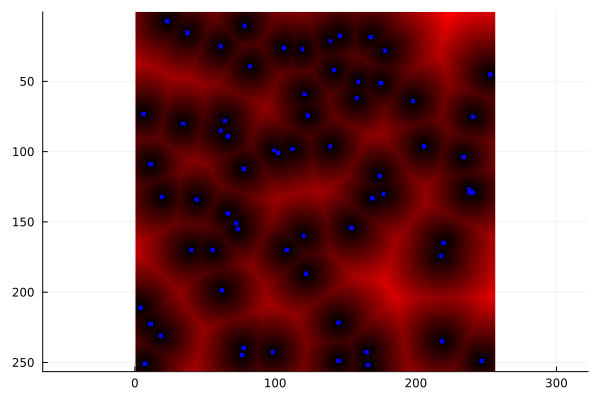

In [10]:
plot(toImageSDF(dotsSDF))

In [11]:
@time midpointSDF = bruteSDF2D(midpoint)

  2.891650 seconds (2 allocations: 512.047 KiB)


256×256 Matrix{Float64}:
 178.898  178.192  177.489  176.789  …  176.789  177.489  178.192  178.898
 178.192  177.484  176.778  176.075     176.075  176.778  177.484  178.192
 177.489  176.778  176.07   175.364     175.364  176.07   176.778  177.489
 176.789  176.075  175.364  174.655     174.655  175.364  176.075  176.789
 176.092  175.375  174.661  173.95      173.95   174.661  175.375  176.092
 175.398  174.678  173.961  173.247  …  173.247  173.961  174.678  175.398
 174.707  173.984  173.264  172.547     172.547  173.264  173.984  174.707
 174.019  173.293  172.57   171.85      171.85   172.57   173.293  174.019
 173.333  172.605  171.879  171.156     171.156  171.879  172.605  173.333
 172.651  171.92   171.191  170.466     170.466  171.191  171.92   172.651
 171.972  171.238  170.507  169.778  …  169.778  170.507  171.238  171.972
 171.297  170.559  169.825  169.093     169.093  169.825  170.559  171.297
 170.624  169.884  169.146  168.412     168.412  169.146  169.884  170.624


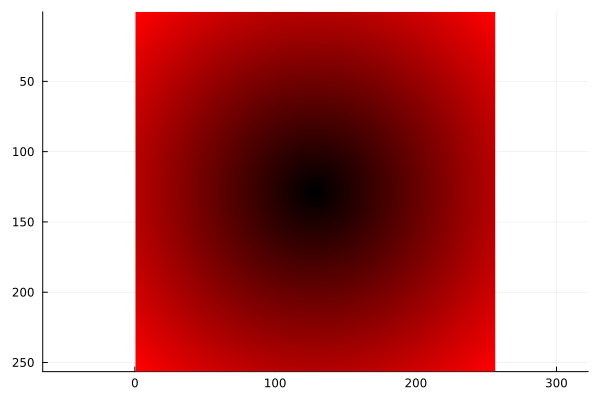

In [12]:
plot(toImageSDF(midpointSDF, 0.0029))